In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller, acf, pacf
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
import ruptures as rpt

In [97]:
df = pd.read_csv('cleaned_CCI.csv')
df.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [98]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 224 rows and 63 columns.


In [99]:
print(df.columns)

Index(['Country', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  224 non-null    object 
 1   1961     224 non-null    float64
 2   1962     224 non-null    float64
 3   1963     224 non-null    float64
 4   1964     224 non-null    float64
 5   1965     224 non-null    float64
 6   1966     224 non-null    float64
 7   1967     224 non-null    float64
 8   1968     224 non-null    float64
 9   1969     224 non-null    float64
 10  1970     224 non-null    float64
 11  1971     224 non-null    float64
 12  1972     224 non-null    float64
 13  1973     224 non-null    float64
 14  1974     224 non-null    float64
 15  1975     224 non-null    float64
 16  1976     224 non-null    float64
 17  1977     224 non-null    float64
 18  1978     224 non-null    float64
 19  1979     224 non-null    float64
 20  1980     224 non-null    float64
 21  1981     224 non

In [101]:
print(f'Number of distinct countries: {df["Country"].nunique()}')

Number of distinct countries: 224


In [102]:
df.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,...,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,0.160830,-0.009152,0.009964,-0.086674,-0.245594,0.115442,-0.112629,-0.201201,0.161576,0.094487,...,0.928263,1.106612,1.264402,1.438067,1.282781,1.296661,1.435487,1.535112,1.342558,1.370491
std,0.400065,0.342407,0.391686,0.307657,0.281670,0.374010,0.341463,0.276734,0.310199,0.347662,...,0.317371,0.562165,0.472770,0.408198,0.394003,0.592414,0.474746,0.640105,0.488458,0.665712
min,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,-1.288000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,-0.101000,-0.164000,-0.203250,-0.246000,-0.392500,-0.048750,-0.269000,-0.366500,-0.009000,-0.055250,...,0.747750,0.744000,1.022500,1.146750,1.030500,0.877000,1.157500,1.134000,1.019750,0.874750
50%,0.064500,-0.056000,0.037000,-0.075000,-0.226000,0.098000,-0.140000,-0.189000,0.198000,0.129500,...,0.897000,0.985500,1.214000,1.444500,1.282000,1.124000,1.407500,1.453000,1.338000,1.303500
75%,0.276750,0.125250,0.235000,0.117000,-0.089250,0.288500,0.019000,-0.066750,0.347000,0.302750,...,1.182250,1.324250,1.516500,1.702000,1.527000,1.679250,1.692000,1.790500,1.625250,1.907250
max,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,0.978000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [103]:
world_df = df[df['Country'] == 'World']
countries_df = df[df['Country'] != 'World']
world_df.head()

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
220,World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,...,1.016,1.053,1.412,1.66,1.429,1.29,1.444,1.711,1.447,1.394


In [104]:
countries_melted = countries_df.melt(id_vars='Country', var_name='Year', value_name='Temperature_Change')

countries_melted['Year'] = pd.to_numeric(countries_melted['Year'])
countries_melted

,Country,Year,Temperature_Change
0,"Afghanistan, Islamic Rep. of",1961,-0.113
1,Albania,1961,0.627
2,Algeria,1961,0.164
3,American Samoa,1961,0.079
4,"Andorra, Principality of",1961,0.736
...,...,...,...
13821,West Bank and Gaza,2022,1.074
13822,Western Sahara,2022,1.970
13823,"Yemen, Rep. of",2022,1.394
13824,Zambia,2022,0.686


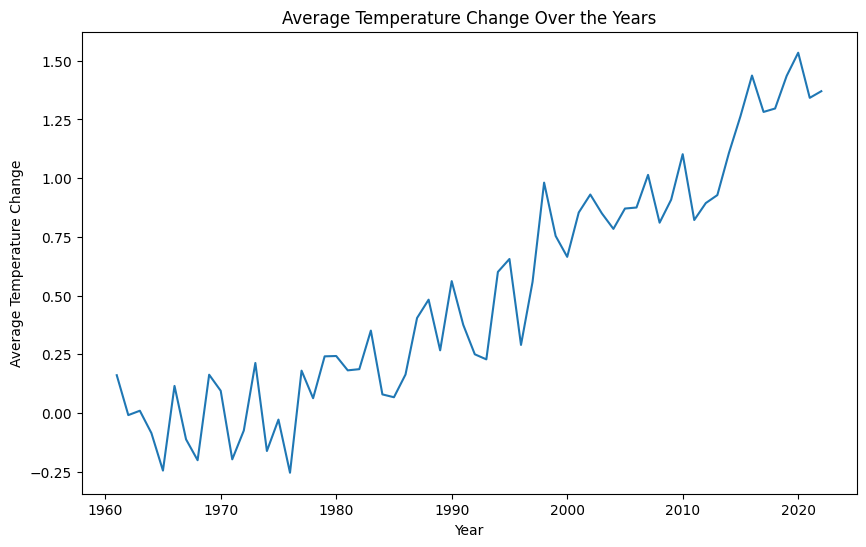

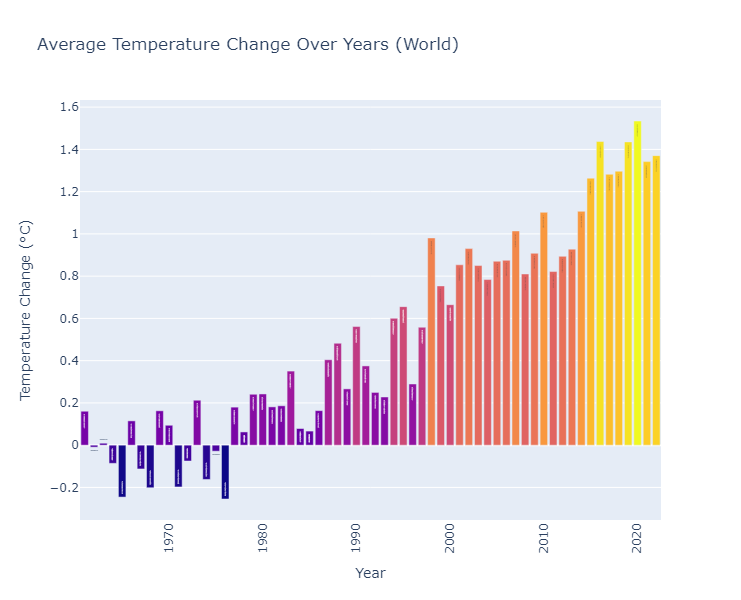

In [105]:
avg_temp_change = countries_melted.groupby('Year')['Temperature_Change'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_temp_change, x='Year', y='Temperature_Change')
plt.title('Average Temperature Change Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change')
plt.show()


fig = px.bar(avg_temp_change, x='Year', y='Temperature_Change',
             title='Average Temperature Change Over Years (World)',
             labels={'Year': 'Year', 'Temperature_Change': 'Temperature Change (°C)'},
             text='Temperature_Change',color='Temperature_Change', 
             color_discrete_sequence=['#1f77b4'])

fig.update_layout(xaxis_tickangle=-90,
                  showlegend=False,
                  width=1000,
                  height=600,
                  coloraxis_showscale=False)

fig.show()

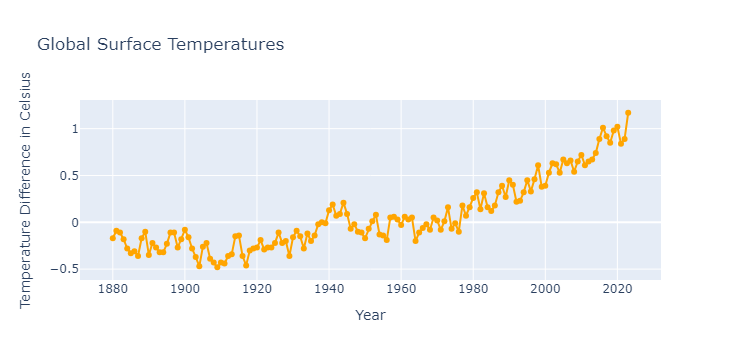

In [106]:
#downloading the global temperature dataset
temp = pd.read_csv("Global_annual_mean_temp.csv")

#creating a line chart
fig = px.line(temp, x='Year', y='No_Smoothing',
              color_discrete_sequence = ['orange'],
              markers=True,
              title="Global Surface Temperatures",
              labels={"No_Smoothing":"Temperature Difference in Celsius"}
              )
fig.show()

In [107]:
# Load additional datasets
co2_df = pd.read_csv('atmospheric co2 levels.csv')
sea_level_df = pd.read_csv('Global_sea_level_rise.csv')
ocean_heat_df = pd.read_csv('ocean_heat_anomaly.csv')

# Merge with world_df on Year
world_melted = world_df.melt(id_vars='Country', var_name='Year', value_name='Temperature_Change')
world_melted['Year'] = pd.to_numeric(world_melted['Year'])

combined_df = world_melted.merge(co2_df, on='Year').merge(sea_level_df, on='Year').merge(ocean_heat_df, on='Year')

# Display the combined dataframe
combined_df.head()


,Country,Year,Temperature_Change,Avg co2 level,Sea level change,ocean heat anomaly
0,World,1979,0.226,336.85,-46.814062,-1.640448
1,World,1980,0.332,338.91,-41.880729,1.813644
2,World,1981,0.443,340.11,-25.980729,0.533019
3,World,1982,0.086,340.86,-37.880729,-1.675871
4,World,1983,0.460,342.53,-22.280729,2.378227


In [108]:
world_melted

,Country,Year,Temperature_Change
0,World,1961,0.211
1,World,1962,0.038
2,World,1963,0.168
3,World,1964,-0.246
4,World,1965,-0.223
...,...,...,...
57,World,2018,1.290
58,World,2019,1.444
59,World,2020,1.711
60,World,2021,1.447


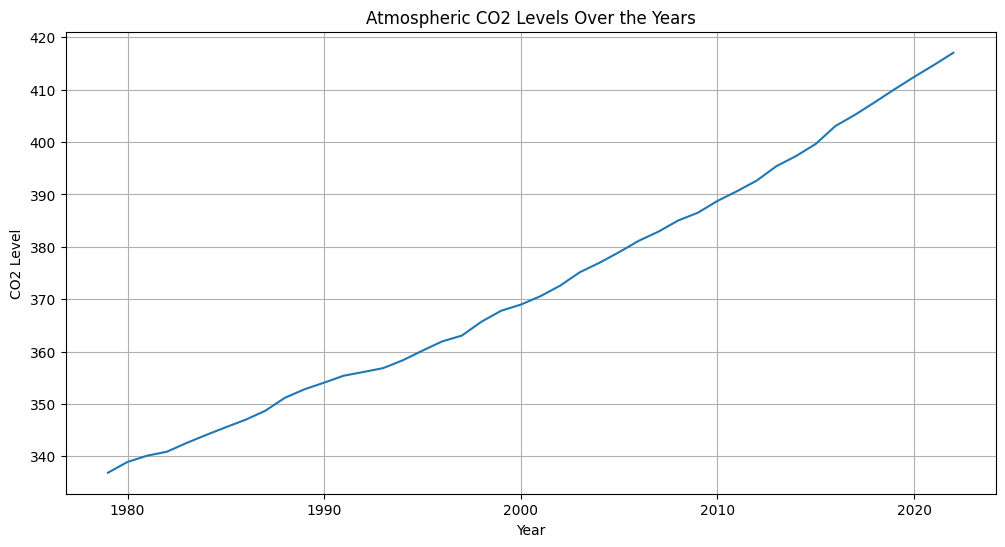

In [110]:
# CO2 Levels
plt.figure(figsize=(12, 6))
plt.plot(co2_df['Year'], co2_df['Avg co2 level'])
plt.title('Atmospheric CO2 Levels Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.grid(True)
plt.show()

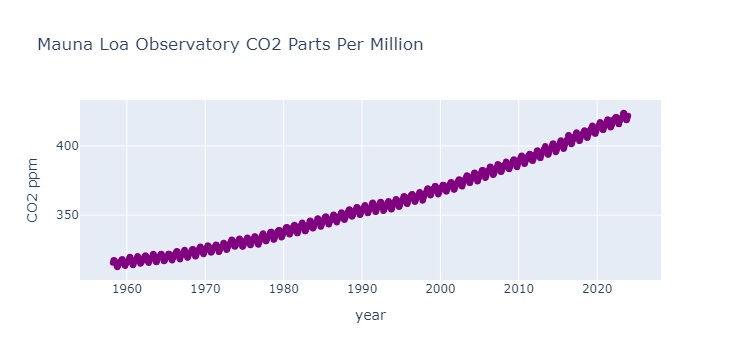

In [111]:
co2 = pd.read_csv("co2_mm_mlo.csv")

#creating a line chart
fig = px.line(co2, x='decimal date', y='average',
              color_discrete_sequence = ['purple'],
              markers=True,
              hover_data=['year','month','average'],
              title='Mauna Loa Observatory CO2 Parts Per Million',
              labels={'decimal date':'year', 'average':'CO2 ppm'})
fig.show()

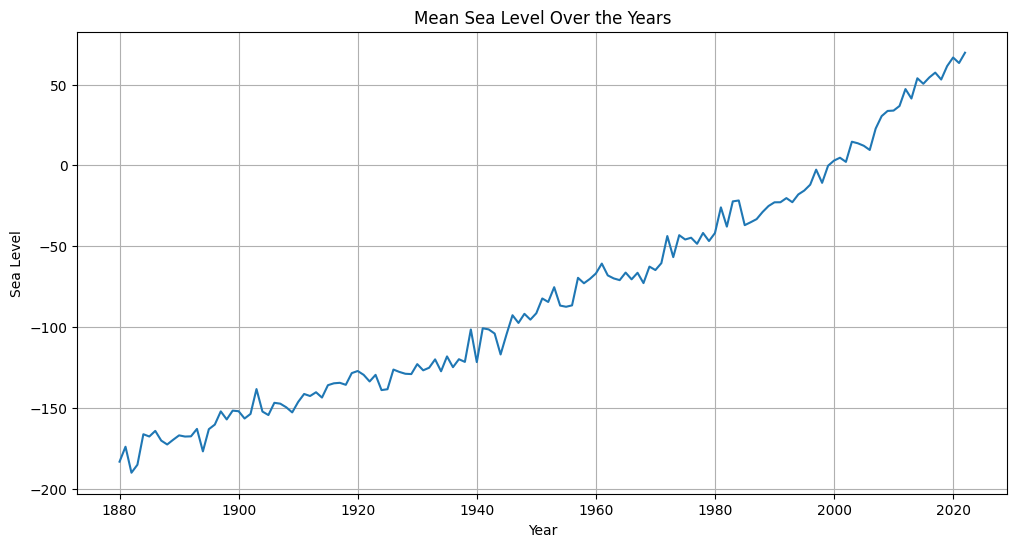

In [112]:
# Mean Sea Level
plt.figure(figsize=(12, 6))
plt.plot(sea_level_df['Year'], sea_level_df['Sea level change'])
plt.title('Mean Sea Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.grid(True)
plt.show()

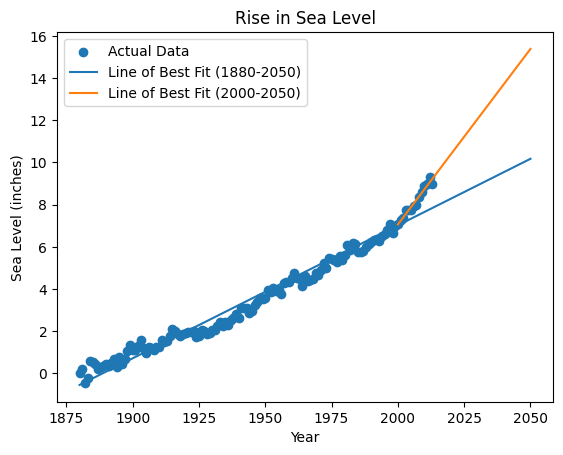

In [113]:
from scipy.stats import linregress

def draw_plot():
    # Read the data from the CSV file
    df = pd.read_csv('epa-sea-level.csv')

    # Create a scatter plot
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Actual Data')

    # Get the slope, intercept, r_value, p_value, and std_err of the line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create a line of best fit using the entire dataset
    line_fit = [slope * year + intercept for year in range(1880, 2051)]
    plt.plot(range(1880, 2051), line_fit, label='Line of Best Fit (1880-2050)')

    # Create a line of best fit using data from 2000 onward
    recent_data = df[df['Year'] >= 2000]
    slope_recent, intercept_recent, _, _, _ = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])
    line_fit_recent = [slope_recent * year + intercept_recent for year in range(2000, 2051)]
    plt.plot(range(2000, 2051), line_fit_recent, label='Line of Best Fit (2000-2050)')

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')

    # Add legend
    plt.legend()

    # Save and return the plot
    plt.savefig('sea_level_plot.png')
    plt.show()

# Run the function to generate the plot
draw_plot()


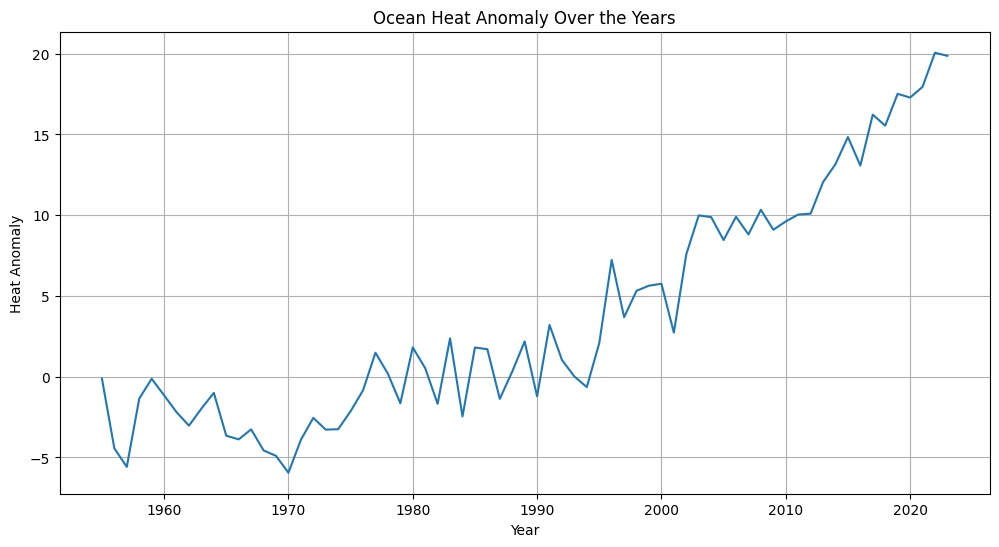

In [114]:
# Ocean Heat Anomaly
plt.figure(figsize=(12, 6))
plt.plot(ocean_heat_df['Year'], ocean_heat_df['ocean heat anomaly'])
plt.title('Ocean Heat Anomaly Over the Years')
plt.xlabel('Year')
plt.ylabel('Heat Anomaly')
plt.grid(True)
plt.show()

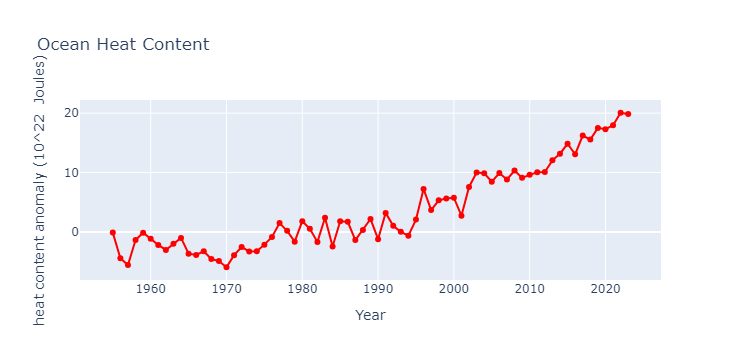

In [115]:
#downloading the ocean heat dataset
octemp = pd.read_csv('ohc_levitus_climdash_seasonal.csv')

#creating a line chart
fig = px.line(octemp, x='Year', y='heat content anomaly (10^22  Joules)',
              color_discrete_sequence = ['red'],
              markers=True,
              title='Ocean Heat Content')
fig.show()

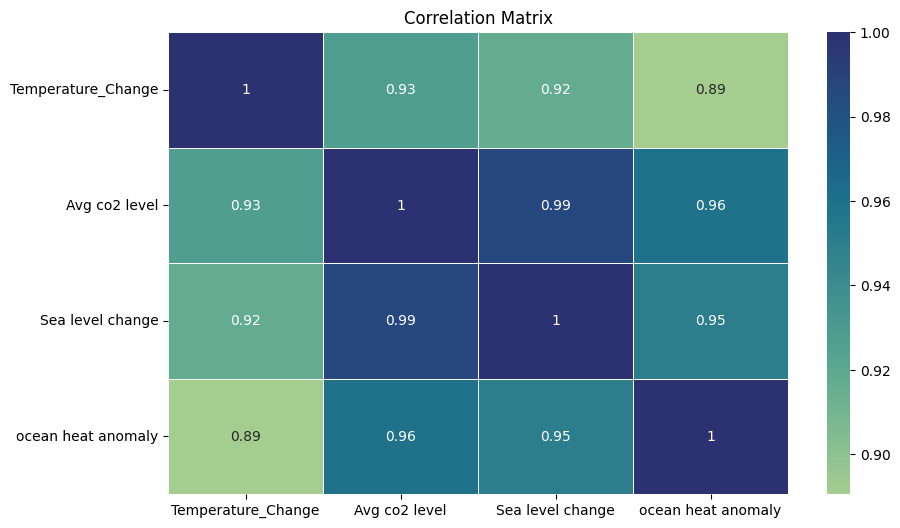

In [116]:
columns_to_drop = ['Country','Year']
combined_df = combined_df.drop(columns_to_drop, axis=1)

corr_matrix = combined_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [117]:
# Prepare the data
X = world_melted.index.values.reshape(-1, 1)
y = world_melted['Temperature_Change'].values

# Linear regression
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Print R-squared
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

R-squared: 0.8606094012635294


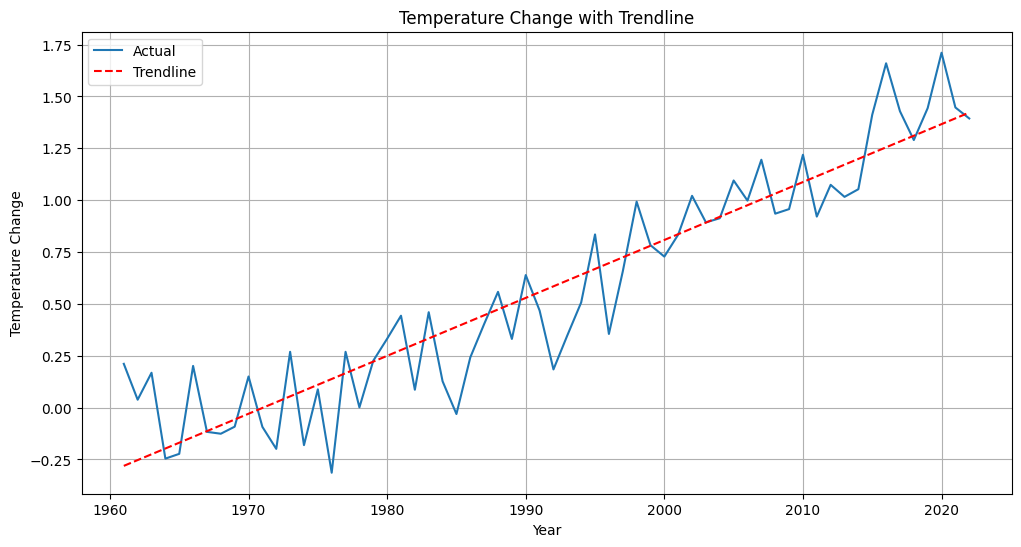

In [118]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(world_melted['Year'], world_melted['Temperature_Change'], label='Actual')
plt.plot(world_melted['Year'], trendline, color='red', linestyle='--', label='Trendline')
plt.title('Temperature Change with Trendline')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()

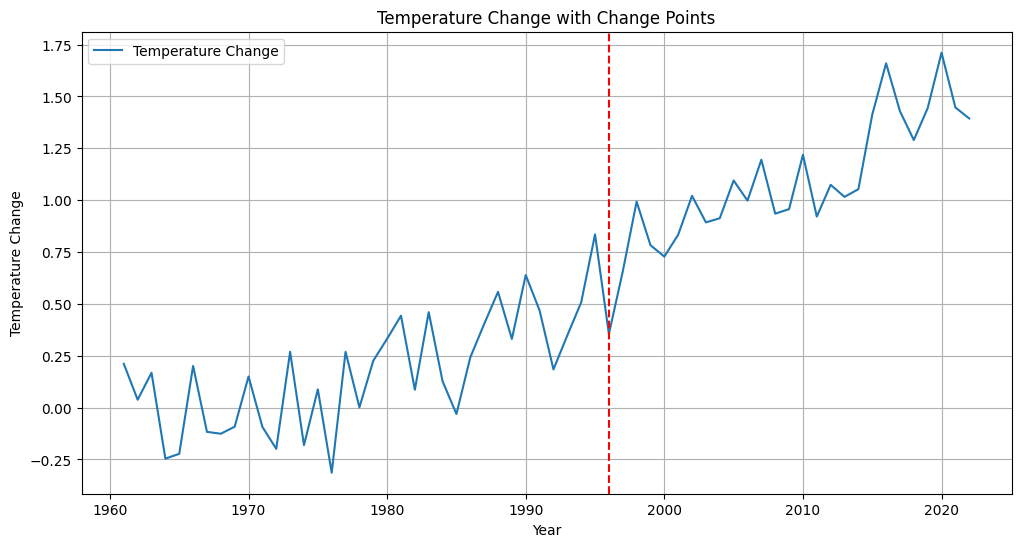

In [119]:
# Detect change points
algo = rpt.Pelt(model="rbf").fit(y)
result = algo.predict(pen=10)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(world_melted['Year'], world_melted['Temperature_Change'], label='Temperature Change')
for cp in result:
    if cp < len(world_melted['Year']):
        plt.axvline(x=world_melted['Year'][cp], color='red', linestyle='--')
plt.title('Temperature Change with Change Points')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()

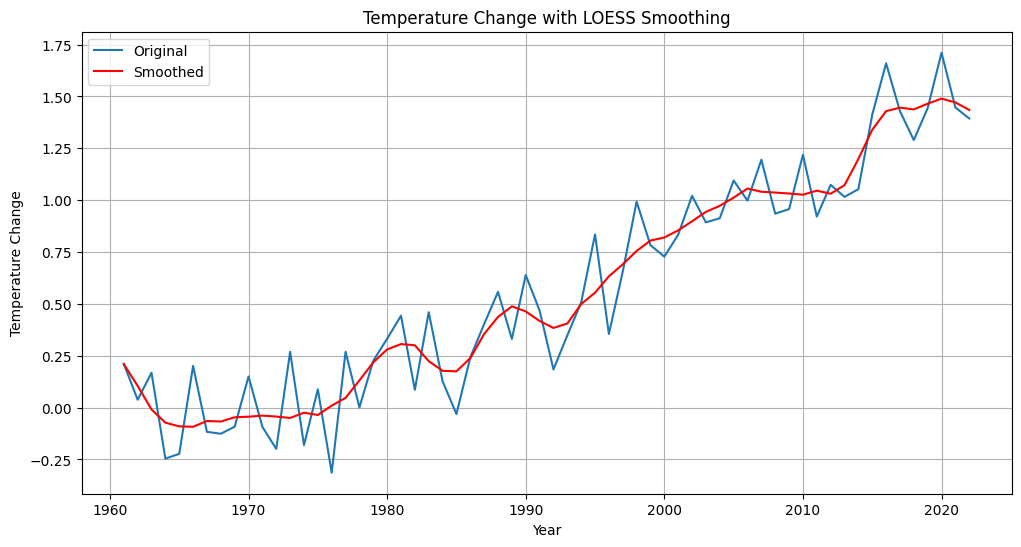

In [120]:
# Apply LOESS smoothing
smoothed = lowess(world_melted['Temperature_Change'], world_melted['Year'], frac=0.1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(world_melted['Year'], world_melted['Temperature_Change'], label='Original')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smoothed')
plt.title('Temperature Change with LOESS Smoothing')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
world_melted = world_melted.drop('Country', axis=1)
world_melted = world_melted.set_index('Year')
warnings.filterwarnings('ignore')

# ADF test for stationarity
result = adfuller(world_melted['Temperature_Change'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.198221168932904
p-value: 0.995973570052519


In [122]:
# Step 2: Differencing to achieve stationarity
df_diff = world_melted.diff().dropna()
result_diff = adfuller(df_diff['Temperature_Change'])
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -5.026619767439498
p-value after differencing: 1.9652700572105682e-05


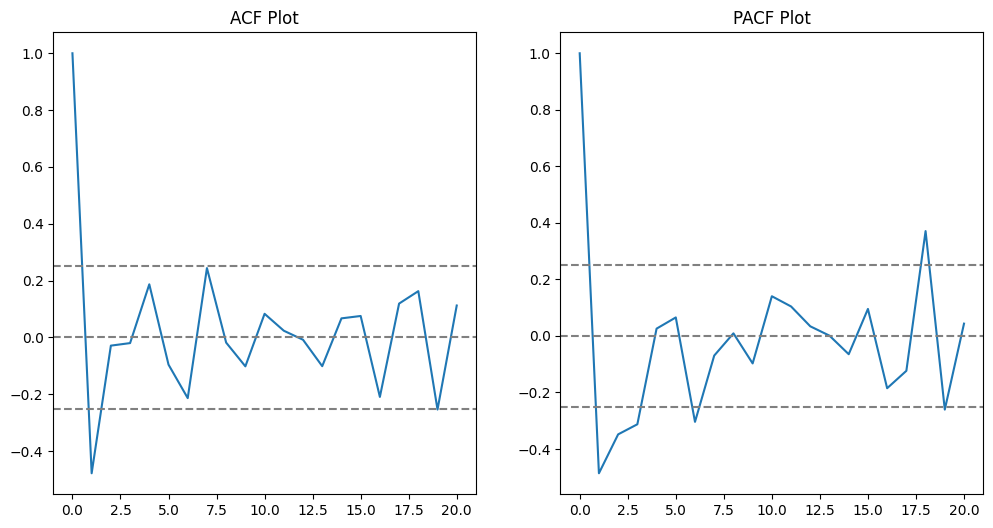

In [123]:
# Step 3: ACF and PACF plots
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(acf(df_diff, nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('ACF Plot')

plt.subplot(122)
plt.plot(pacf(df_diff, nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_diff)), linestyle='--', color='gray')
plt.title('PACF Plot')
plt.show()

In [124]:
# Step 4: Model selection and validation
# Fit ARIMA model
model = ARIMA(world_melted['Temperature_Change'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Temperature_Change   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                   9.820
Date:                Sat, 05 Oct 2024   AIC                             -7.640
Time:                        23:05:29   BIC                              5.026
Sample:                             0   HQIC                            -2.676
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6921      0.135     -5.122      0.000      -0.957      -0.427
ar.L2         -0.3997      0.173     -2.308      0.021      -0.739      -0.060
ar.L3         -0.1349      0.178     -0.756      0.4

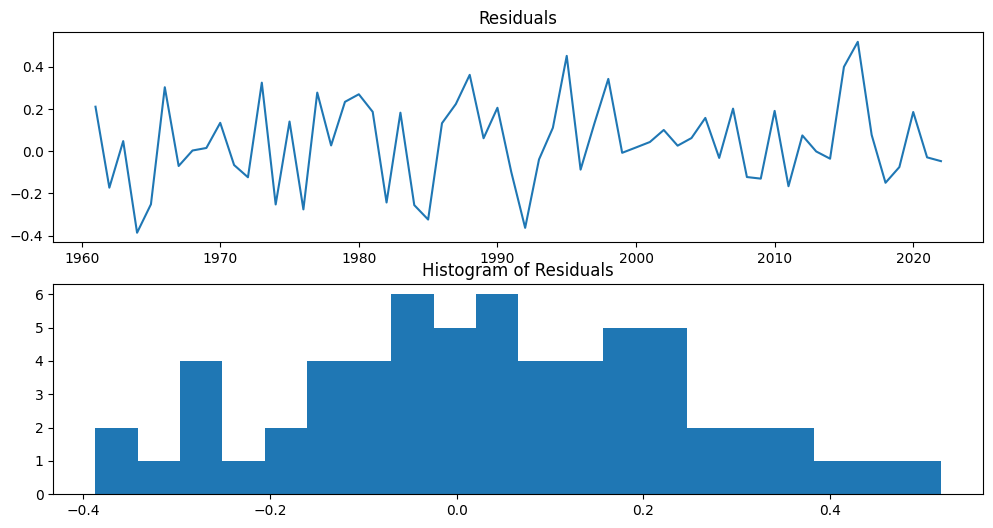

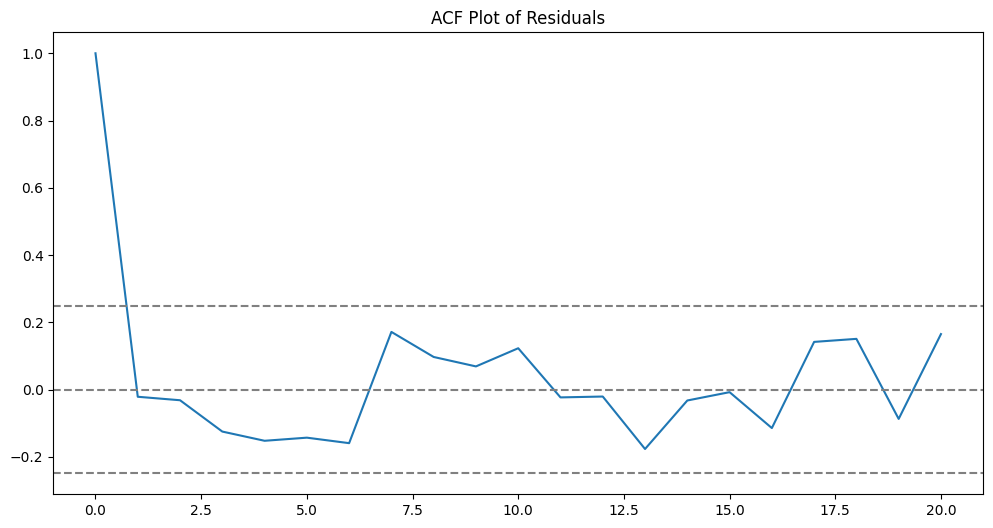

In [125]:
# Check residuals
residuals = model_fit.resid
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()

# ACF plot of residuals
plt.figure(figsize=(12,6))
plt.plot(acf(residuals, nlags=20))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(residuals)), linestyle='--', color='gray')
plt.title('ACF Plot of Residuals')
plt.show()

In [126]:
# Forecast
forecast_steps = 25
forecast = model_fit.forecast(steps=forecast_steps)

In [127]:
# Generate index for the forecast
last_year = 2022
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]

# Convert forecast to numpy array
forecast_values = forecast.to_numpy()

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast_values, index=forecast_years, columns=['Forecast'])

forecast_df

,Forecast
2023,1.508889
2024,1.560219
2025,1.475297
2026,1.448507
2027,1.508128
2028,1.515995
2029,1.481756
2030,1.476465
2031,1.500154
2032,1.500897


In [128]:
forecast_df.to_csv('forecast.csv')

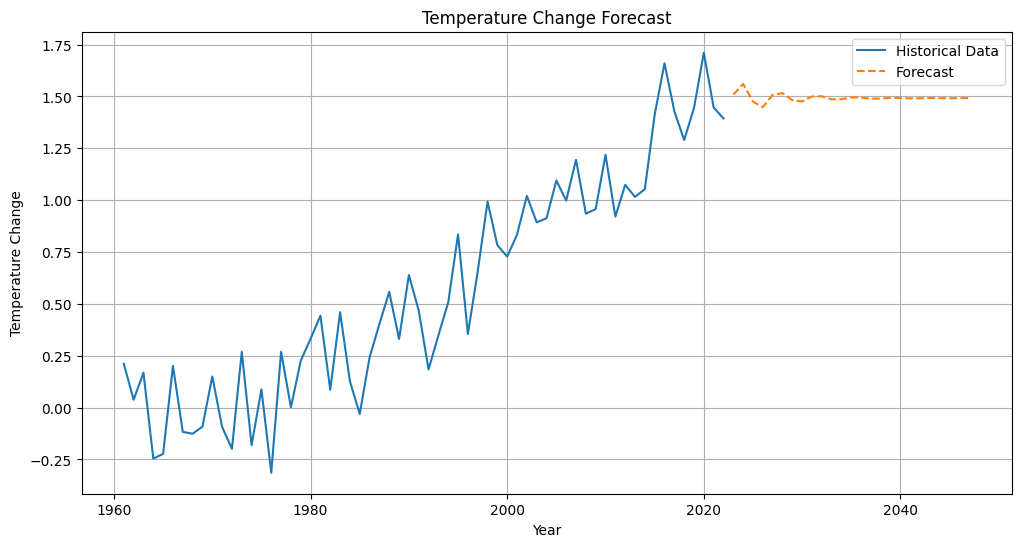

In [129]:
# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(world_melted.index, world_melted['Temperature_Change'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')
plt.title('Temperature Change Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature Change')
plt.legend()
plt.grid(True)
plt.show()